<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/ei_u2_01_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

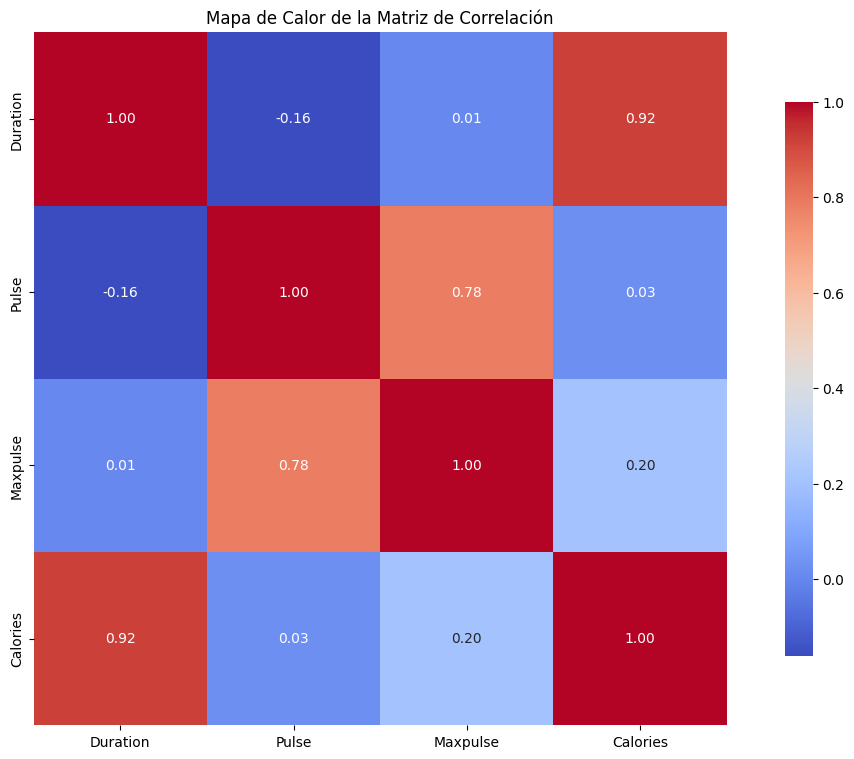

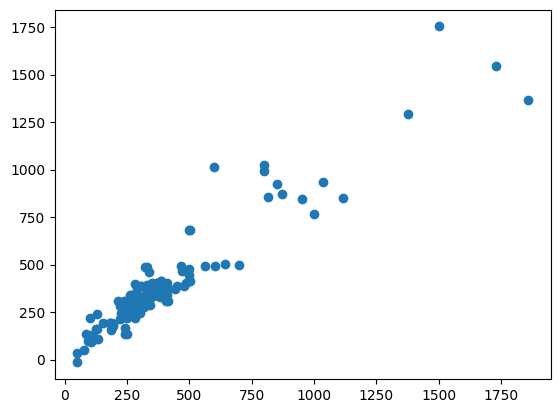

Coeficiente de determinación:  0.8908

valor-p de Shapiro:  0.00000000004660

valor_p de Breusch-Pagan:  0.00000000000008



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/ESTAD-STICA-2/refs/heads/main/data%20(1).csv')
df
# eliminar registros  con valores faltantes
df.dropna(inplace=True)

#Mapa de calor:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
X = df[["Duration", "Maxpulse"]]
Y = df["Calories"]


import statsmodels.api as sm
X_Constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_Constante).fit()

Yc = modelo.predict(X_Constante)

plt.figure()
plt.scatter(Y, Yc)
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

residuales = modelo.resid

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.14f}\n')
# Se rechaza Ho


from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, X_Constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.14f}\n')
# Se rechaza Ho ya que el valor es muy bajo